In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_fs_z = pd.read_csv(os.path.join(folder_path, "features_combined_fs_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_fs_mm = pd.read_csv(os.path.join(folder_path, "features_combined_fs_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_fs_mm_cl= df_combined_fs_mm.drop(columns=['filename', 'label'])
df_combined_fs_z_cl= df_combined_fs_z.drop(columns=['filename', 'label'])


Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

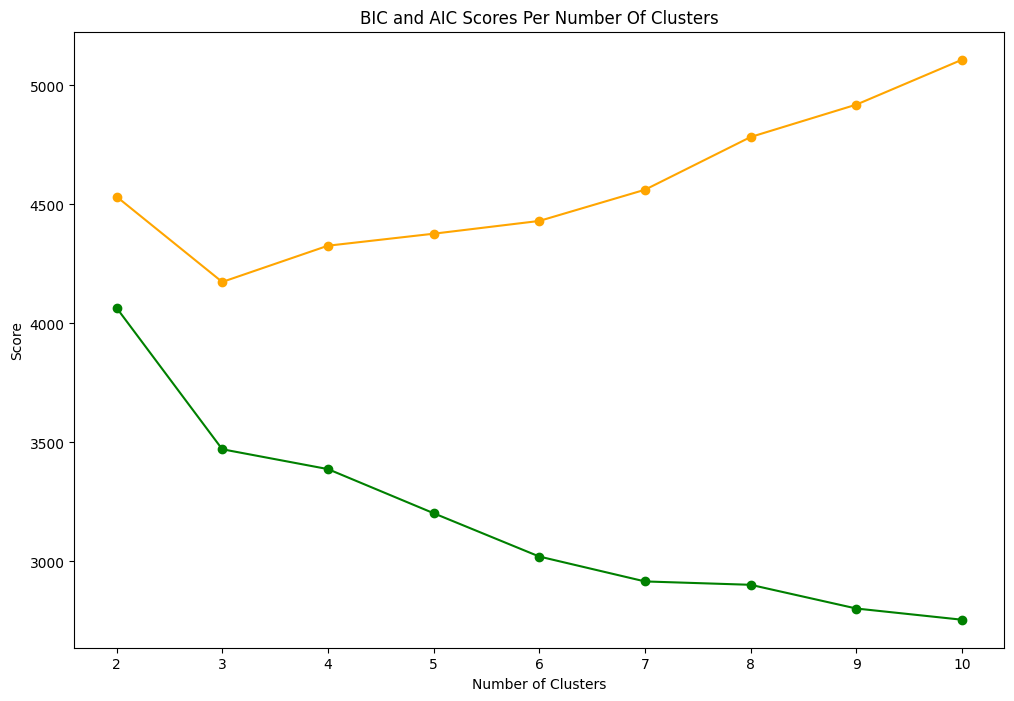

In [3]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_fs_z_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_fs_z_cl))
    aic_score.append(gm.aic(df_combined_fs_z_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')


In [4]:
n_components = 2  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_z.items():
    gmm_model.fit(df_combined_fs_z_cl)


covariances_z = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_z.items()}

predictions_z = {cov_type: gmm_model.predict(df_combined_fs_z_cl)
               for cov_type, gmm_model in gmm_models_z.items()}

Covariance Matrix (full - Component):
[[ 0.45002097 -0.14681174  0.11176169  0.07941163  0.25957     0.2899613
   0.27134974  0.2783035   0.27190627]
 [-0.14681174  0.79889624 -0.18104533 -0.01273714  0.16031955 -0.1065984
  -0.0468862  -0.07099171 -0.08448421]
 [ 0.11176169 -0.18104533  0.81292051  0.6185724  -0.14337585 -0.06193289
  -0.28529222 -0.07586318 -0.11296054]
 [ 0.07941163 -0.01273714  0.6185724   0.84656262 -0.15525025 -0.15005166
  -0.22546499 -0.15876011 -0.199298  ]
 [ 0.25957     0.16031955 -0.14337585 -0.15525025  0.29972923  0.21412484
   0.24953778  0.21835438  0.2194227 ]
 [ 0.2899613  -0.1065984  -0.06193289 -0.15005166  0.21412484  0.52668919
   0.23732572  0.52889636  0.52785601]
 [ 0.27134974 -0.0468862  -0.28529222 -0.22546499  0.24953778  0.23732572
   0.35426373  0.2338016   0.2542389 ]
 [ 0.2783035  -0.07099171 -0.07586318 -0.15876011  0.21835438  0.52889636
   0.2338016   0.5907694   0.57979387]
 [ 0.27190627 -0.08448421 -0.11296054 -0.199298    0.2194227

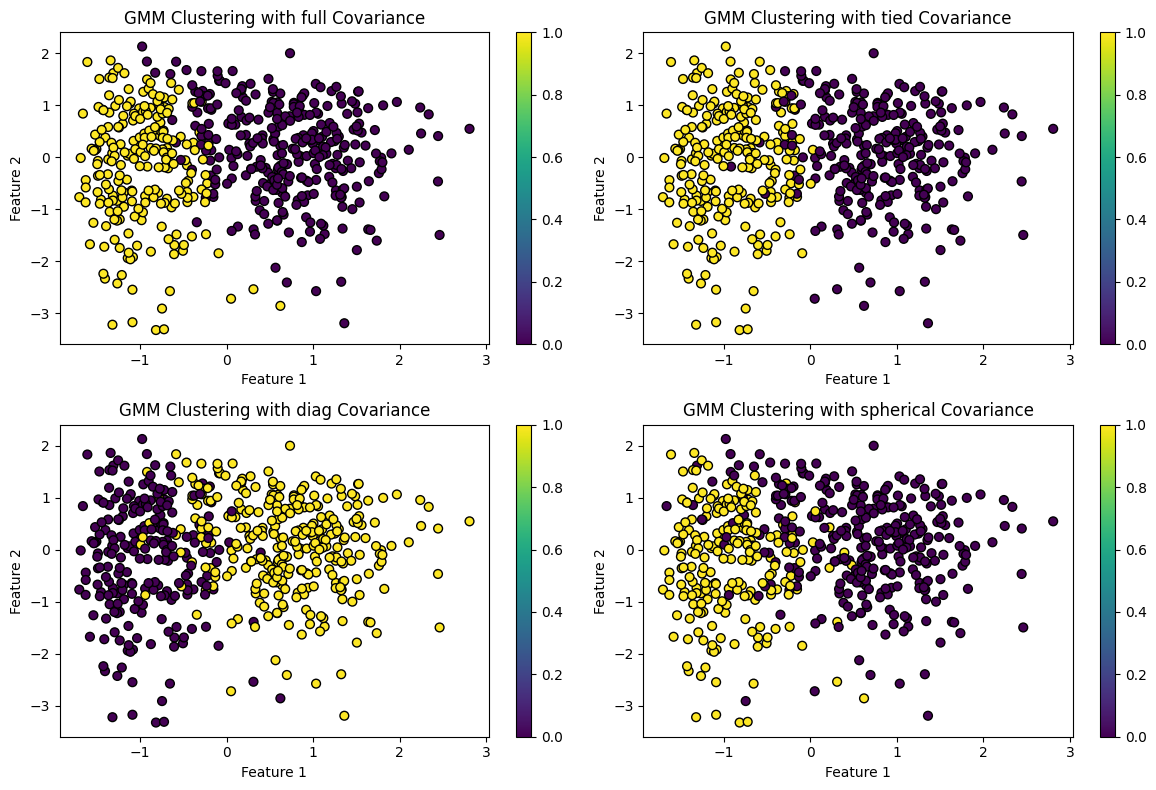

In [5]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_fs_z_cl.iloc[:, 0], df_combined_fs_z_cl.iloc[:, 1], c=predictions_z[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_z[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


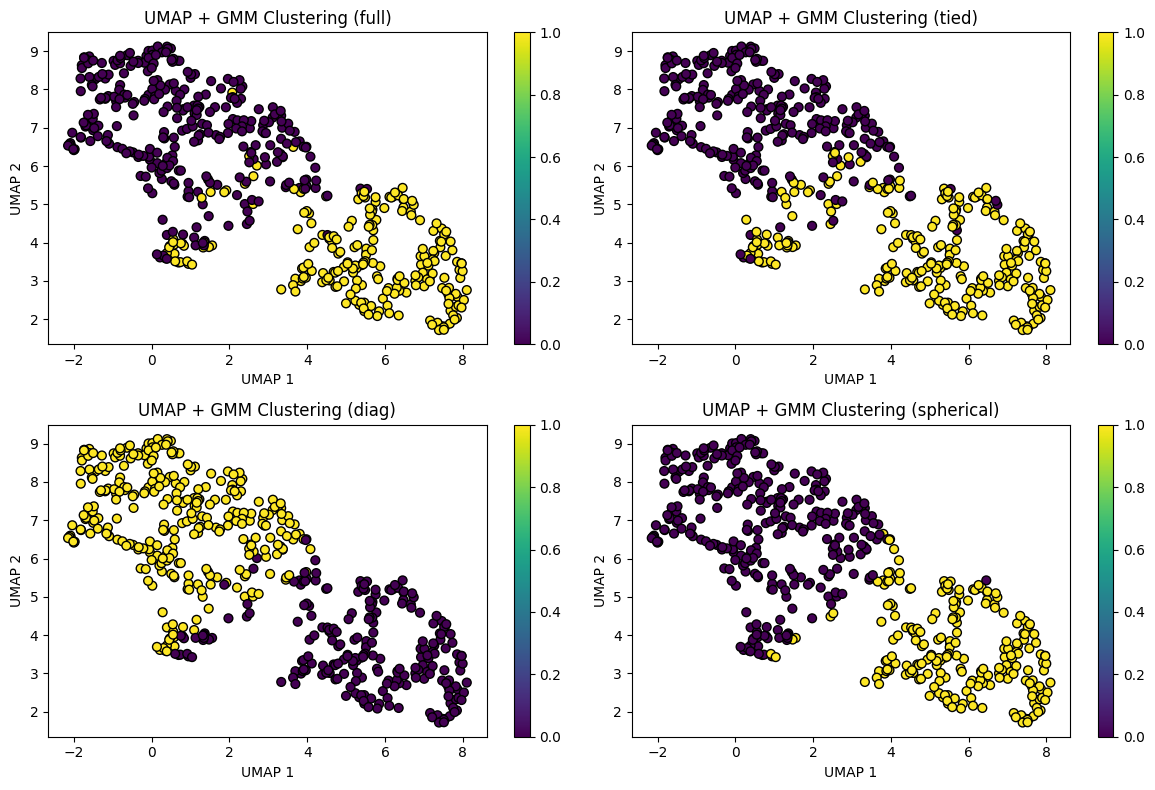

In [6]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_combined_fs_z_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_z[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()


In [7]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_fs_z_cl, predictions_z[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.364
Tied covariance: Silhouette Score = 0.348
Diag covariance: Silhouette Score = 0.388
Spherical covariance: Silhouette Score = 0.388


In [15]:
df_combined_fs_z['predictions_z_full'] = predictions_z['full']
df_combined_fs_z['predictions_z_tied'] = predictions_z['tied']
df_combined_fs_z['predictions_z_diag'] = predictions_z['diag']
df_combined_fs_z['predictions_z_spherical'] = predictions_z['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_fs_z['label'], df_combined_fs_z['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_fs_z['label'], df_combined_fs_z['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_fs_z['label'], df_combined_fs_z['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_fs_z['label'], df_combined_fs_z['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0    1
Label                   
higher          253   15
smaller          56  213

Contingency Table for Tied Covariance:
Cluster (tied)    0    1
Label                   
higher          249   19
smaller          32  237

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1
Label                   
higher           23  245
smaller         212   57

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1
Label                        
higher               245   23
smaller               73  196


Min-max:

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

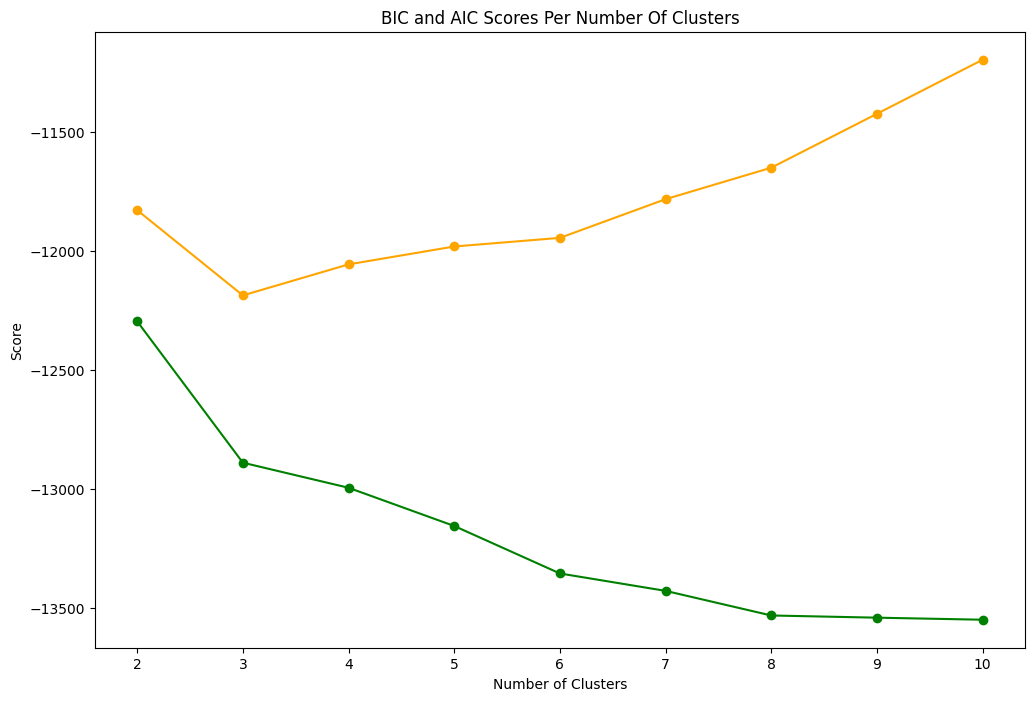

In [8]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_fs_mm_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_fs_mm_cl))
    aic_score.append(gm.aic(df_combined_fs_mm_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [10]:
n_components = 2  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_mm.items():
    gmm_model.fit(df_combined_fs_mm_cl)


covariances_mm = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_mm.items()}

predictions_mm = {cov_type: gmm_model.predict(df_combined_fs_mm_cl)
               for cov_type, gmm_model in gmm_models_mm.items()}

Covariance Matrix (full - Component):
[[ 8.40849273e-03 -1.54963781e-03 -2.39173058e-03 -7.57111611e-05
   8.82029349e-03  6.44091504e-03  8.71956528e-03  6.26671909e-03
   5.74274457e-03]
 [-1.54963781e-03  4.04863521e-02 -1.03214954e-02 -8.55895027e-03
   7.52553363e-03  1.58887099e-03  1.44405535e-03  1.98404307e-03
   1.35785944e-03]
 [-2.39173058e-03 -1.03214954e-02  2.78592971e-02  2.16029868e-02
  -9.03579607e-03 -7.19342318e-03 -1.01766457e-02 -6.95884242e-03
  -7.03820123e-03]
 [-7.57111611e-05 -8.55895027e-03  2.16029868e-02  2.66415653e-02
  -6.58517108e-03 -5.34245885e-03 -6.56515560e-03 -4.86268724e-03
  -5.35302081e-03]
 [ 8.82029349e-03  7.52553363e-03 -9.03579607e-03 -6.58517108e-03
   1.27975350e-02  8.74303286e-03  1.13861921e-02  8.55180804e-03
   7.95979142e-03]
 [ 6.44091504e-03  1.58887099e-03 -7.19342318e-03 -5.34245885e-03
   8.74303286e-03  1.07764279e-02  8.59086521e-03  1.10380436e-02
   9.85157400e-03]
 [ 8.71956528e-03  1.44405535e-03 -1.01766457e-02 -6.565

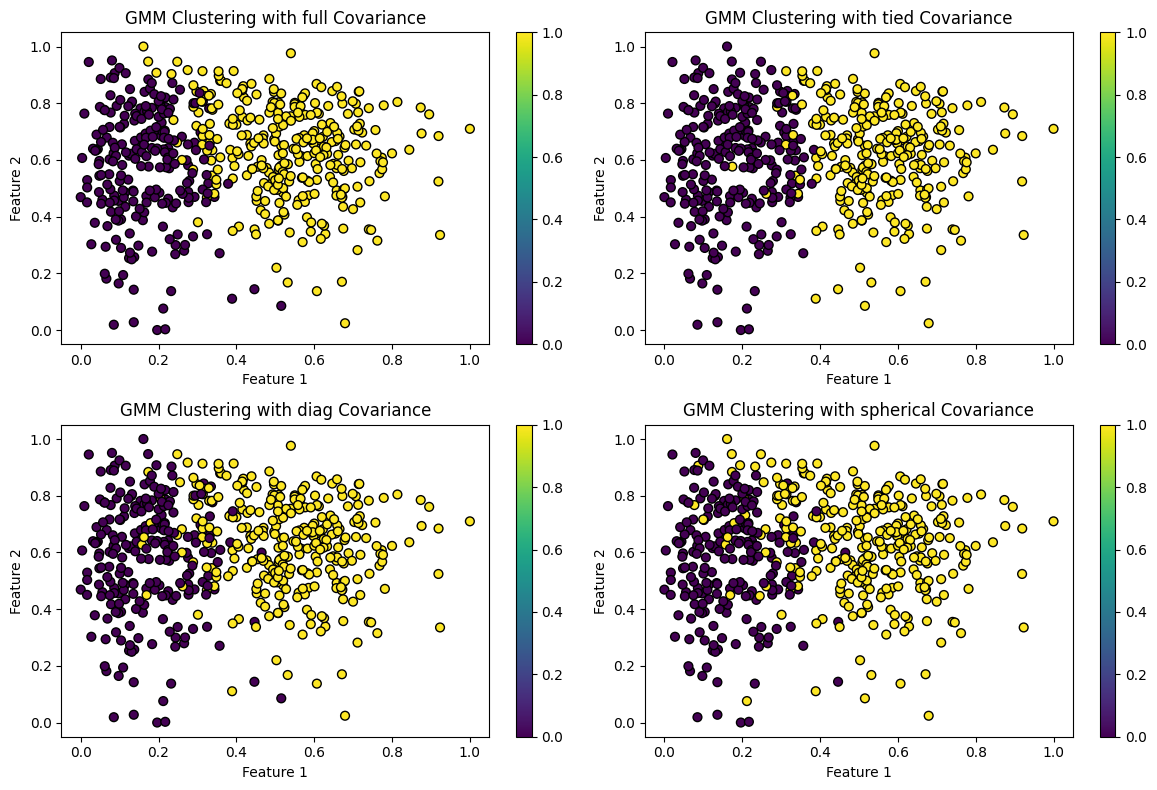

In [11]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_fs_mm_cl.iloc[:, 0], df_combined_fs_mm_cl.iloc[:, 1], c=predictions_mm[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_mm[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


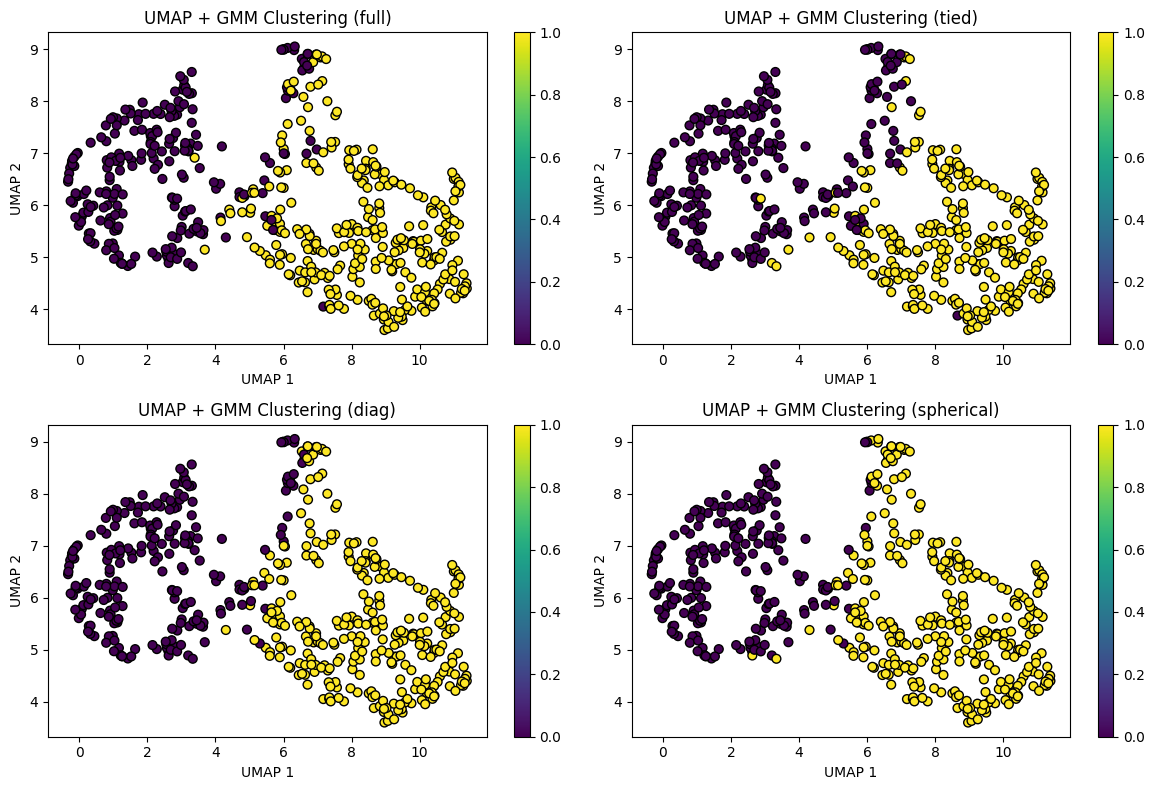

In [12]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_combined_fs_mm_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_mm[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [13]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_fs_mm_cl, predictions_mm[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.385
Tied covariance: Silhouette Score = 0.380
Diag covariance: Silhouette Score = 0.406
Spherical covariance: Silhouette Score = 0.403


In [14]:
df_combined_fs_mm['predictions_z_full'] = predictions_mm['full']
df_combined_fs_mm['predictions_z_tied'] = predictions_mm['tied']
df_combined_fs_mm['predictions_z_diag'] = predictions_mm['diag']
df_combined_fs_mm['predictions_z_spherical'] = predictions_mm['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_fs_mm['label'], df_combined_fs_mm['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_fs_mm['label'], df_combined_fs_mm['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_fs_mm['label'], df_combined_fs_mm['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_fs_mm['label'], df_combined_fs_mm['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0    1
Label                   
higher           17  251
smaller         215   54

Contingency Table for Tied Covariance:
Cluster (tied)    0    1
Label                   
higher           22  246
smaller         240   29

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1
Label                   
higher           23  245
smaller         212   57

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1
Label                        
higher                20  248
smaller              200   69
